In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2026:
        demand.append(200_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,   # example Wijnand
                         debug=False,
                         crane_type_defaults=container_defaults.sts_crane_data, 
                         storage_type_defaults=container_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()

PV: [-2.55035840e+07 -5.12597099e+07  9.23551974e+07  9.32685613e+07
  9.40728009e+07  9.09911115e+07  1.58681087e+08  2.70948477e+08
  2.91969317e+08  2.92928784e+08]
NPV: 1308452042.6022377


## Report all elements

In [7]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

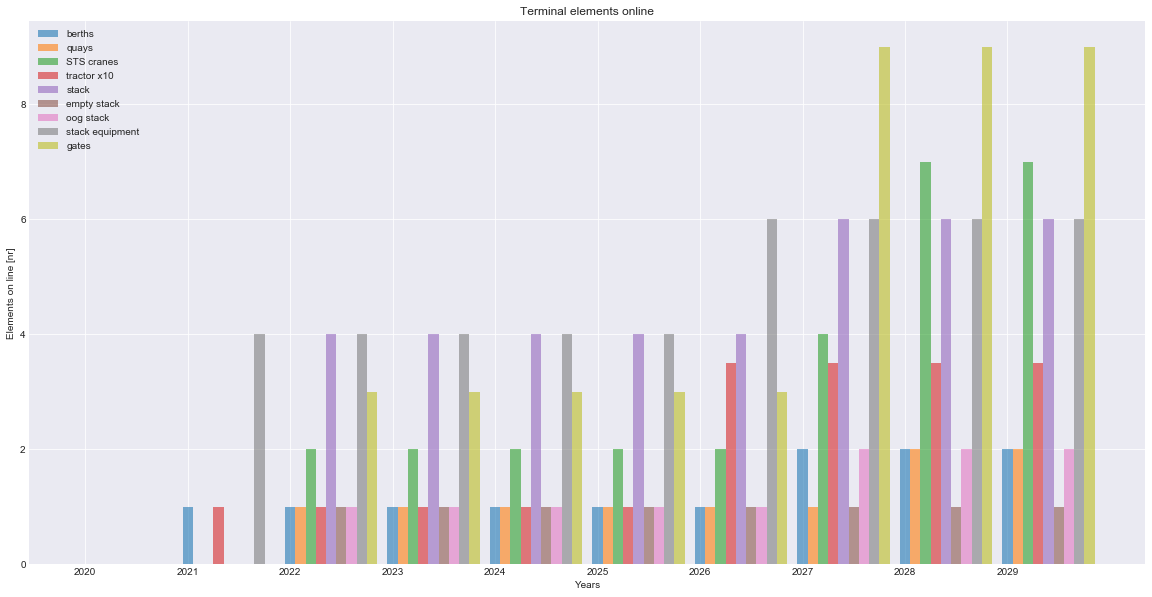

In [8]:
Terminal.terminal_elements_plot()

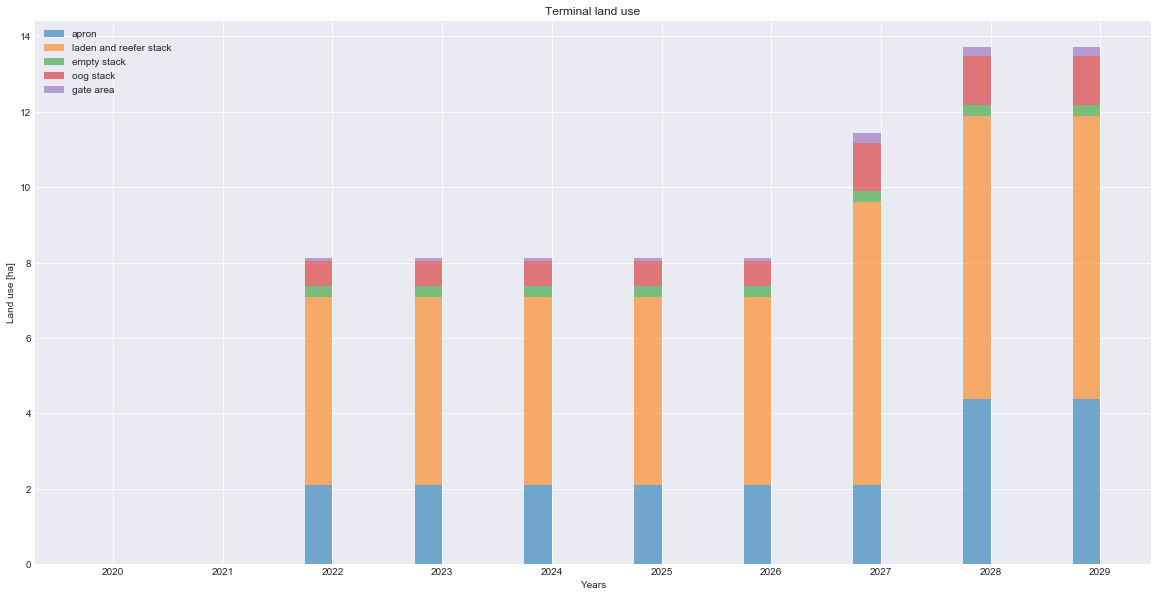

In [9]:
Terminal.land_use_plot()

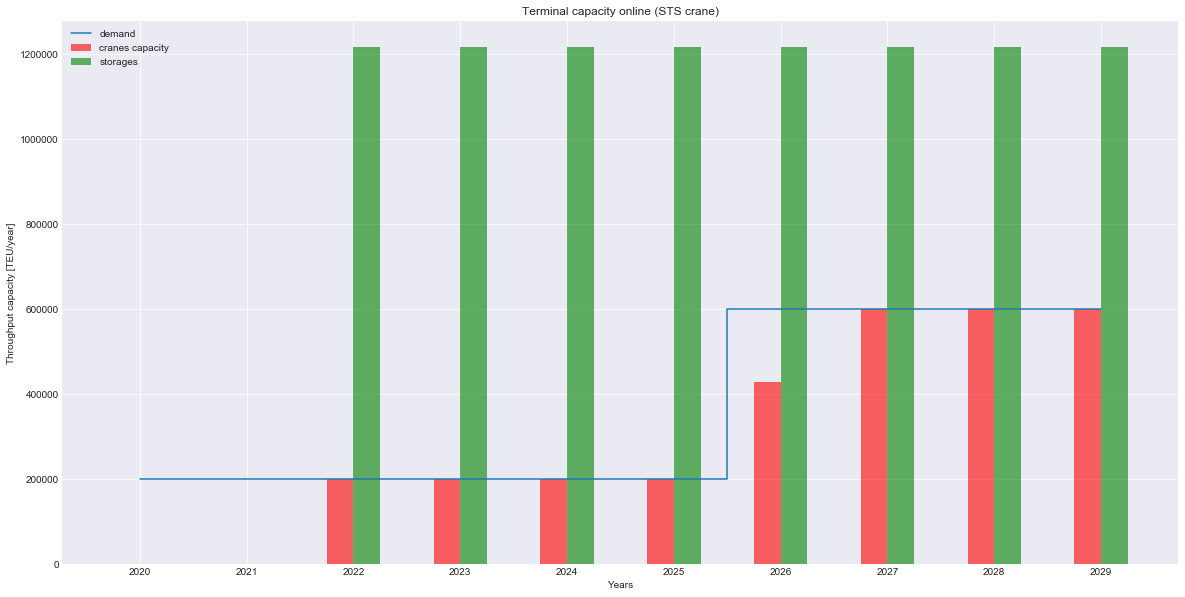

In [10]:
Terminal.terminal_capacity_plot()

In [11]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

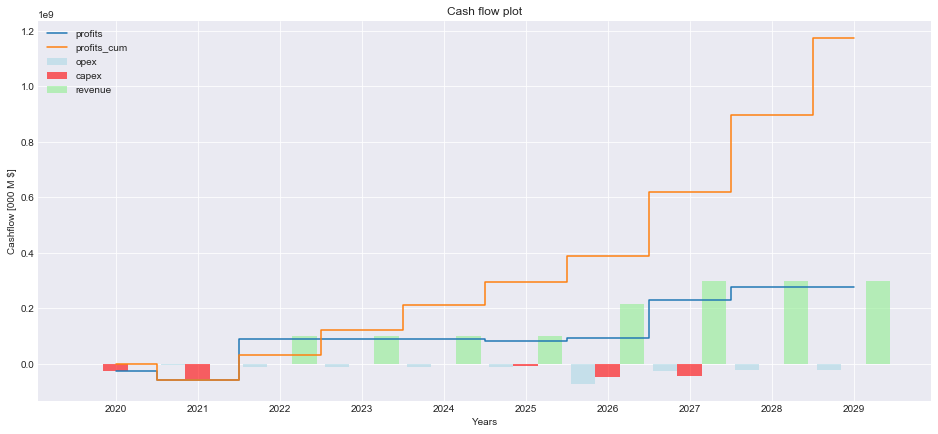

In [12]:
Terminal.cashflow_plot(cash_flows)

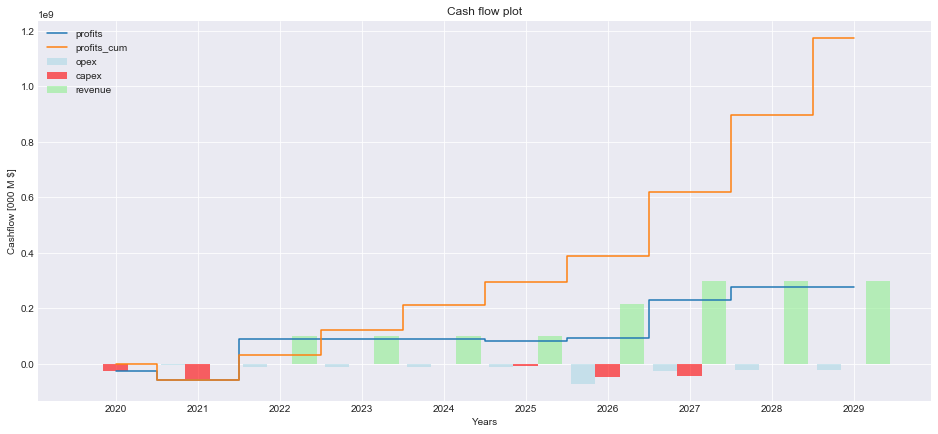

In [13]:

Terminal.cashflow_plot(cash_flows)

## SandBox

In [14]:
Terminal.NPV()

PV: [-2.55035840e+07 -5.12597099e+07  9.23551974e+07  9.32685613e+07
  9.40728009e+07  9.09911115e+07  1.58681087e+08  2.70948477e+08
  2.91969317e+08  2.92928784e+08]
NPV: 1308452042.6022377
